# Setup:
!conda install pyspark openjdk scikit-learn pandas

In [7]:
import sys
import os

sys.path.append(os.path.realpath('..'))
os.environ['PYTHONPATH'] = os.path.realpath('..')

import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from pyspark.sql import SparkSession

ss = SparkSession.builder.master('local').config(
    'spark.executor.instances', '1'
).getOrCreate()

In [3]:
ds = pd.read_csv(f'titanic.csv')
features = ds.drop(['survived', 'alive'], axis=1)
features = features.replace(r'\\s+', np.nan, regex=True)
features = pd.get_dummies(features)
features = features.fillna(features.mean())
target = ds.survived

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

f_t, f_v, t_t, t_v = train_test_split(features, target, test_size=0.5)

m = RandomForestClassifier(n_estimators=10).fit(f_t, t_t)


In [5]:
df = ss.createDataFrame(f_v)

from sparktools.core import score

score_df = score(sc=ss.sparkContext, sdf=df, model=m).cache()

scores = score_df.toPandas()

scores.head()


,label,target_proba
0,positive,0.000000
1,positive,0.500000
2,positive,0.500000
3,positive,0.000000
4,positive,0.033333


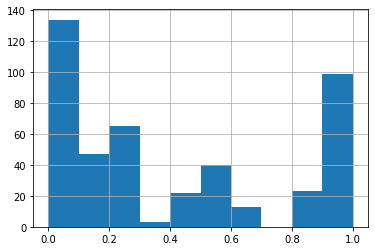

In [9]:
scores.target_proba.hist();